# Analisis Regresi Berganda dengan R

## Input data

In [2]:
# Data fiktif: Motivasi (X1), Minat (X2), Prestasi (Y)
data <- data.frame(
  Motivasi = c(10, 9, 8, 10, 9, 8, 7, 6, 5, 7, 6, 5),
  Minat    = c(6, 7, 8, 5, 6, 7, 9, 8, 7, 8, 9, 10),
  Prestasi = c(70, 75, 80, 65, 70, 75, 85, 80, 75, 85, 90, 95)
)
data

Motivasi,Minat,Prestasi
<dbl>,<dbl>,<dbl>
10,6,70
9,7,75
8,8,80
10,5,65
9,6,70
8,7,75
7,9,85
6,8,80
5,7,75


## Estimasi Model Regresi

In [3]:
model <- lm(Prestasi ~ Motivasi + Minat, data = data)
summary(model)

#misalkan persamaan regresinya adalah prestasi = k1 motivasi + k2 minat



Call:
lm(formula = Prestasi ~ Motivasi + Minat, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6519 -1.1449 -0.2336  1.2266  3.2593 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.94159    8.25703   4.232   0.0022 ** 
Motivasi    -0.07009    0.52157  -0.134   0.8961    
Minat        5.91121    0.64341   9.187 7.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.949 on 9 degrees of freedom
Multiple R-squared:  0.9601,	Adjusted R-squared:  0.9512 
F-statistic: 108.3 on 2 and 9 DF,  p-value: 5.067e-07


dari hasil summary(model) terlihat bahwa persamaan regresi yang didapat adalah Y=34.94159 - 0.07009 Motivasi + 5.91121 Minat
dengan R-squared 95%
nilai F statistic 108.3 dengan p-value = 5.067 x 10^(-7) < alpha = 0.05

## Uji Asumsi Klasik

In [8]:
# Multikolinearitas
install.packages("car")
library(car)
vif(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’


Loading required package: carData



Motivasi    Minat 
2.507788 2.507788

Terlihat vif motivasi dan vif minat kurang dari 10

In [10]:
#Autokorelasi (Durbin-Watson)
install.packages("lmtest")
library(lmtest)
dwtest(model)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	Durbin-Watson test

data:  model
DW = 1.0804, p-value = 0.0155
alternative hypothesis: true autocorrelation is greater than 0


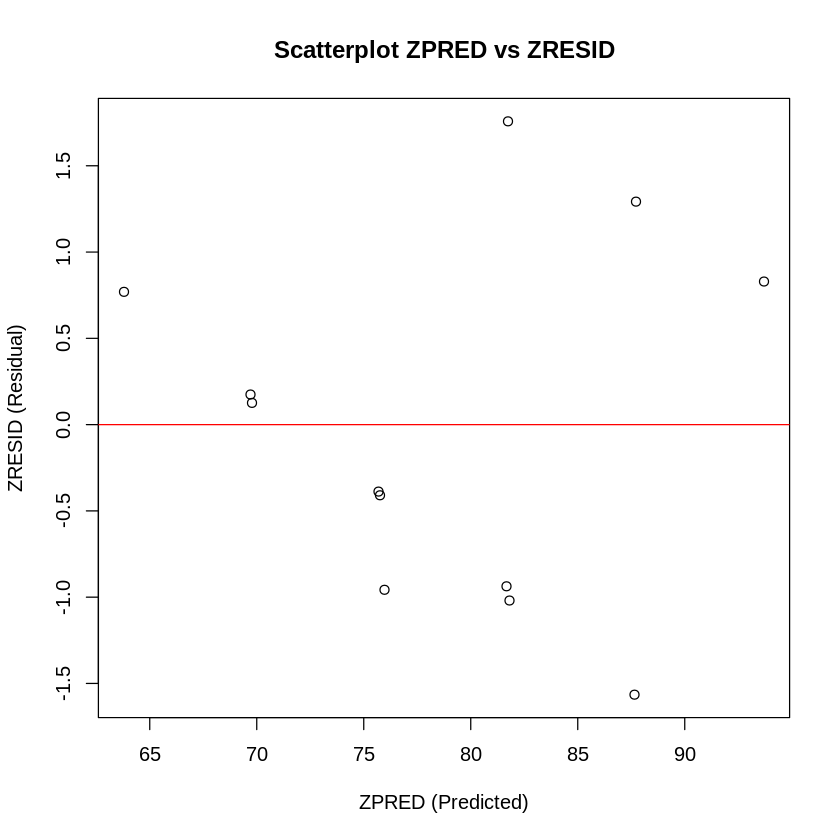

In [11]:
# Heteroskedastisitas
plot(model$fitted.values, rstandard(model),
     xlab = "ZPRED (Predicted)", ylab = "ZRESID (Residual)",
     main = "Scatterplot ZPRED vs ZRESID")
abline(h = 0, col = "red")



	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.97155, p-value = 0.9263


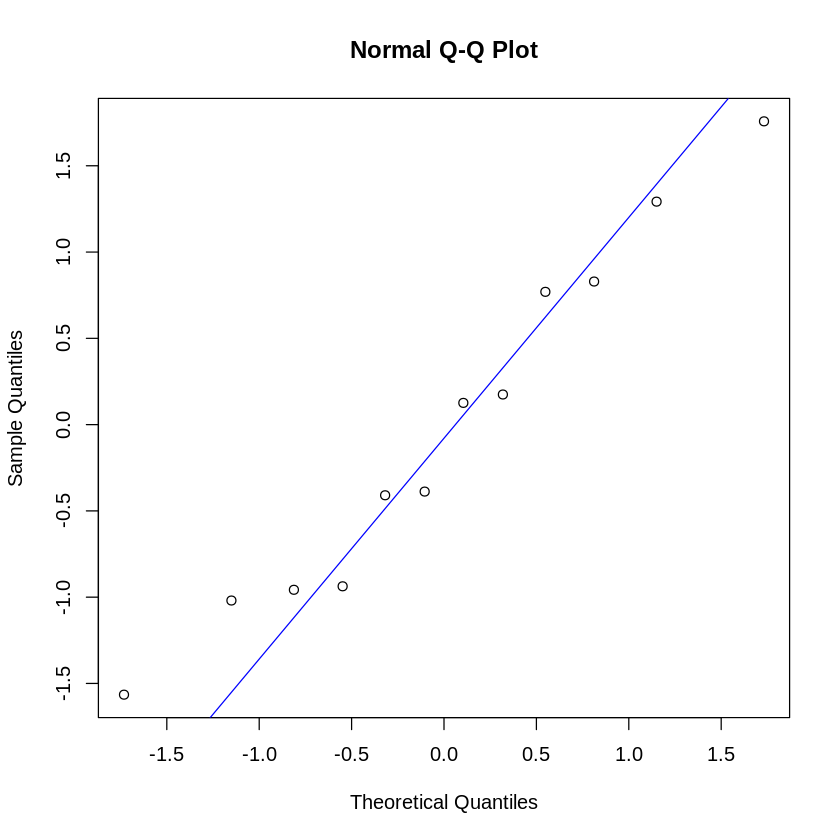

In [12]:
# Normalitas
qqnorm(rstandard(model))
qqline(rstandard(model), col = "blue")

# Uji Kolmogorov-Smirnov (bisa juga pakai Shapiro-Wilk)
shapiro.test(residuals(model))


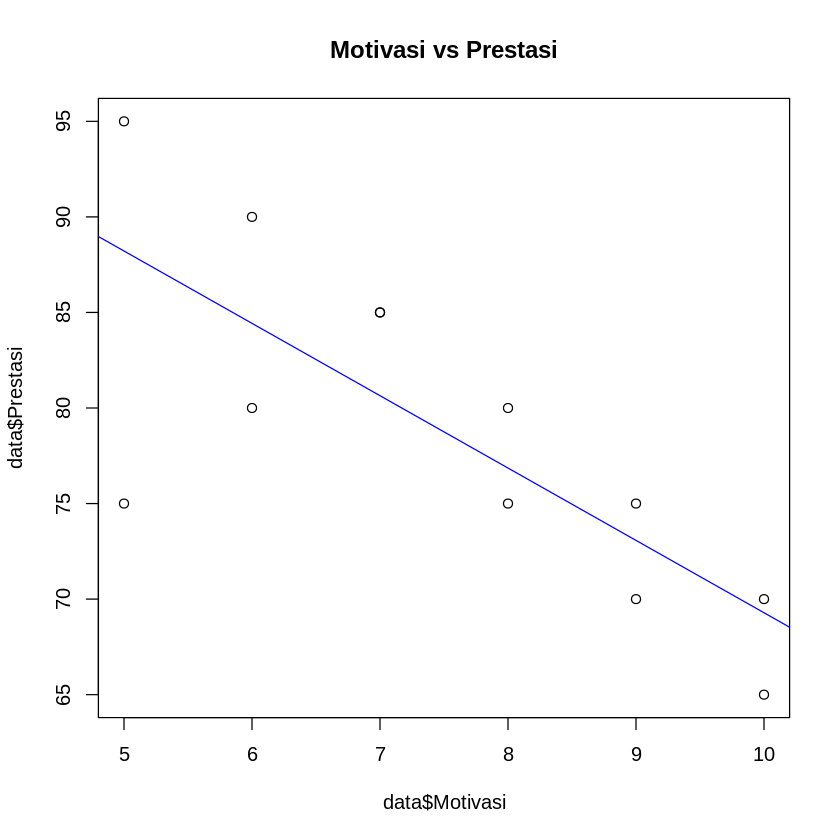

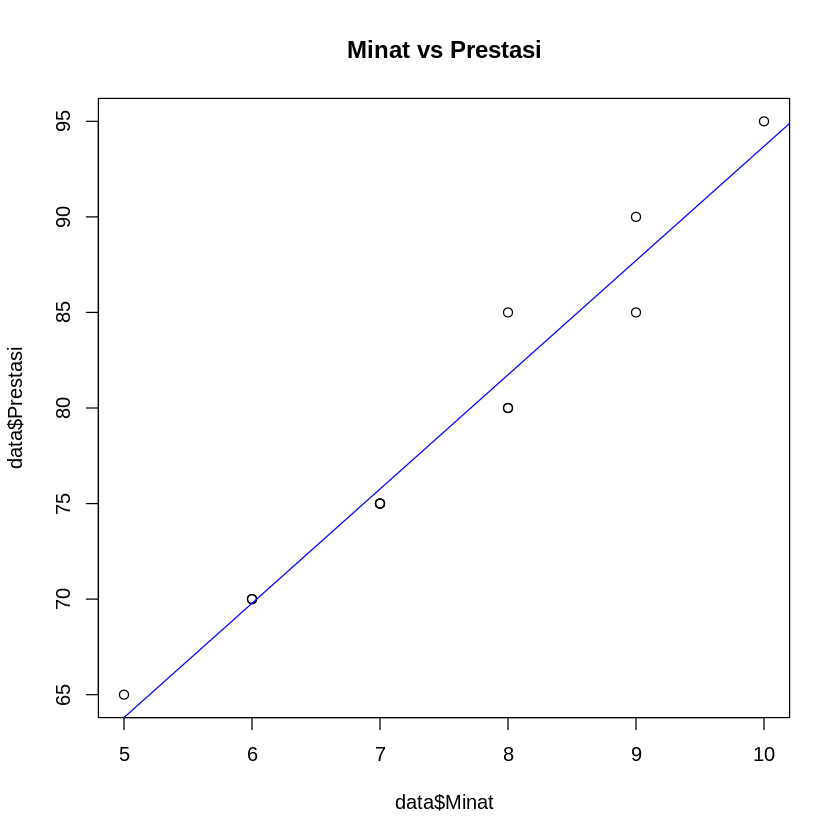

In [13]:
#Linearitas
# Visualisasi hubungan linier
plot(data$Motivasi, data$Prestasi, main="Motivasi vs Prestasi")
abline(lm(Prestasi ~ Motivasi, data = data), col="blue")

plot(data$Minat, data$Prestasi, main="Minat vs Prestasi")
abline(lm(Prestasi ~ Minat, data = data), col="blue")


## Uji Kelayakan Model

In [14]:
summary(model)


Call:
lm(formula = Prestasi ~ Motivasi + Minat, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6519 -1.1449 -0.2336  1.2266  3.2593 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.94159    8.25703   4.232   0.0022 ** 
Motivasi    -0.07009    0.52157  -0.134   0.8961    
Minat        5.91121    0.64341   9.187 7.21e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.949 on 9 degrees of freedom
Multiple R-squared:  0.9601,	Adjusted R-squared:  0.9512 
F-statistic: 108.3 on 2 and 9 DF,  p-value: 5.067e-07


1.   Uji F

2.   Uji t masing-masing koefisien

3. Koefisien Determinasi (R square)



## Kesimpulan

Berdasarkan hasil analisis R yang mereplikasi isi file:

* H1: Motivasi (X1) tidak berpengaruh signifikan terhadap Prestasi (Y)

* H2: Minat (X2) berpengaruh signifikan

* H3: Secara simultan, Motivasi dan Minat berpengaruh signifikan terhadap Prestasi

* R² sekitar 95% → model menjelaskan sebagian besar variasi data.